In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import or install Sionna
try:
    import sionna.rt
except ImportError as e:
    import os
    os.system("pip install sionna-rt")
    import sionna.rt

no_preview = True # Toggle to False to use the preview widget
                  # instead of rendering for scene visualization

from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, Camera,\
                      RadioMapSolver, PathSolver,transform_mesh
from sionna.rt.utils import r_hat, subcarrier_frequencies

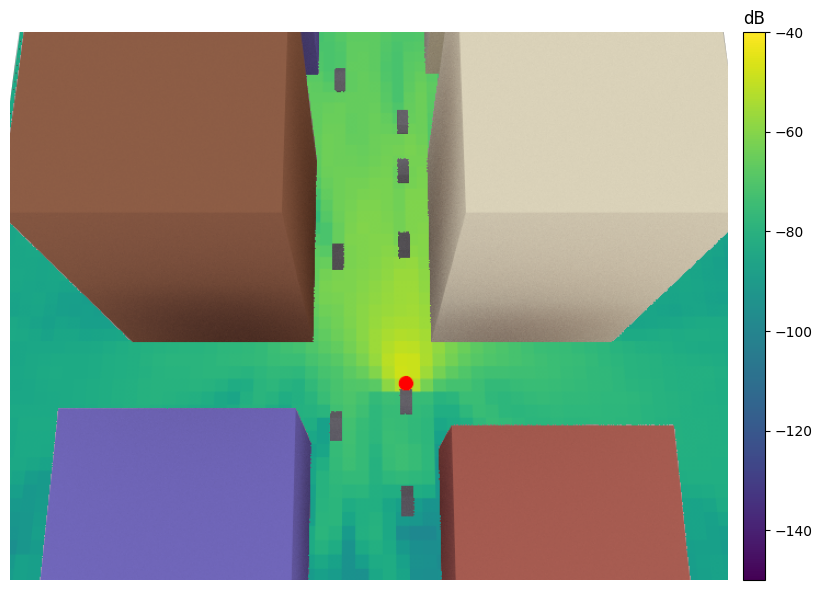

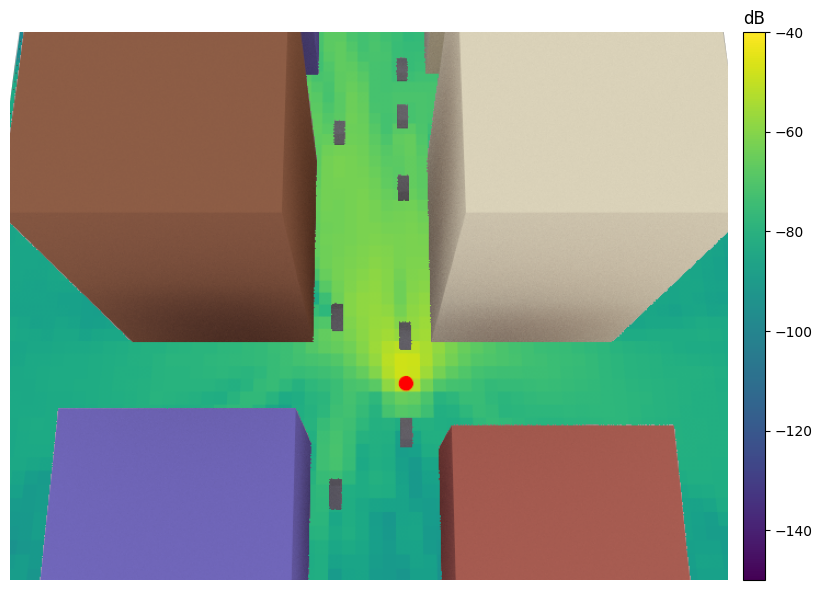

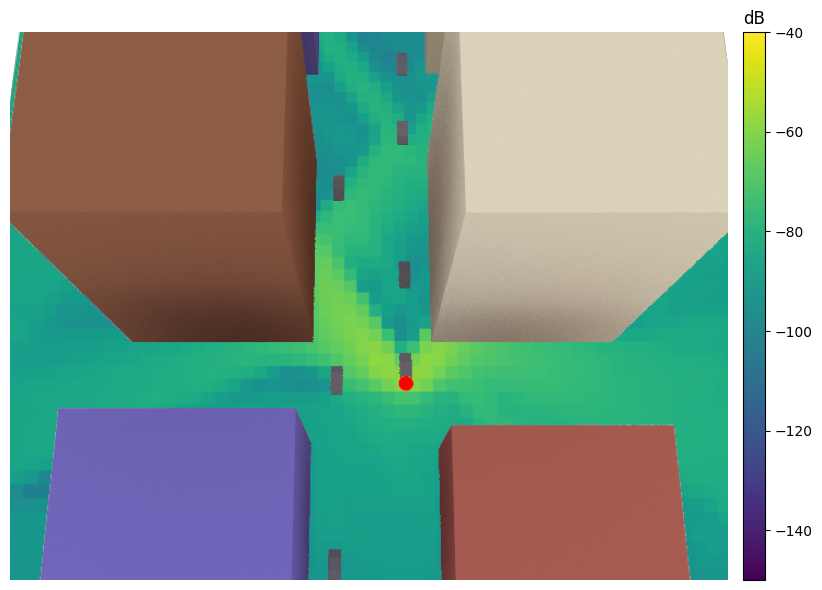

In [5]:
scene = load_scene(sionna.rt.scene.simple_street_canyon_with_cars,
                   merge_shapes=False)
cam =  Camera(position=[50,0,130], look_at=[10,0,0])

# Configure a transmitter that is located at the front of "car_2"
scene.add(Transmitter("tx", position=[22.7, 5.6, 1.5], orientation=[np.pi,0,0]))
scene.tx_array = PlanarArray(num_rows=1, num_cols=1, pattern="tr38901", polarization="V")
scene.rx_array = scene.tx_array

# Create radio map solver
rm_solver = RadioMapSolver()

# Move cars along straight lines for a couple of steps
displacement_vec = [10, 0, 0]
num_displacements = 2
for _ in range(num_displacements+1):

    # Compute and render a coverage map at 0.5m above the ground
    rm = rm_solver(scene=scene,
                   samples_per_tx=20**6,
                   refraction=True,
                   max_depth=10,
                   center=[0,0,0.5],
                   orientation=[0,0,0],
                   size=[186,121],
                   cell_size=[2,2])
    scene.render(camera=cam, radio_map=rm,
                 num_samples=512, rm_show_color_bar=True,
                 rm_vmax=-40, rm_vmin=-150)

    # # Move TX to next position
    # scene.get("tx").position -= displacement_vec

    # Move cars driving in -x direction
    for j in range(1,6):
        scene.get(f"car_{j}").position -= displacement_vec

    # Move cars driving in x direction
    for j in range(6,9):
        scene.get(f"car_{j}").position += displacement_vec

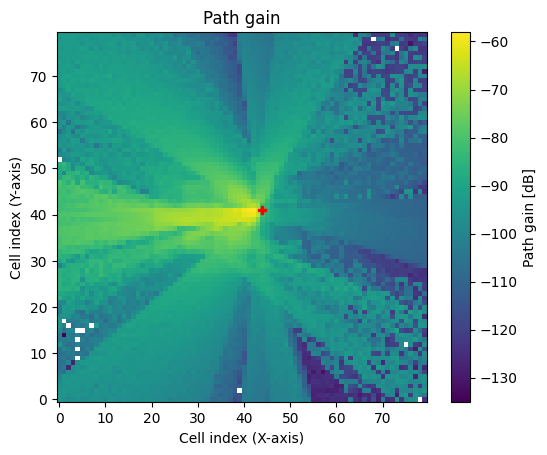

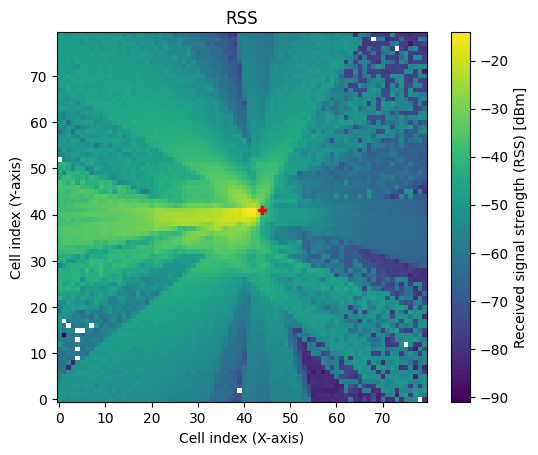

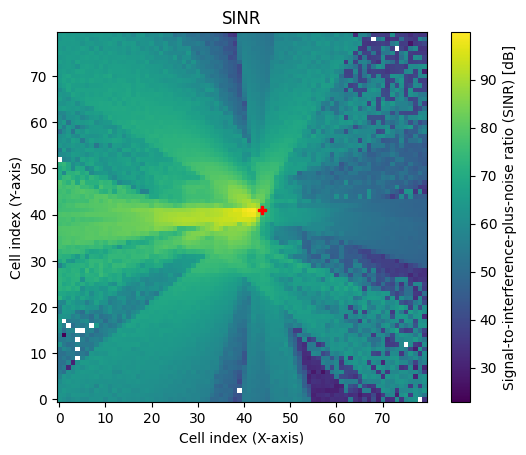

In [5]:
# Visualize path gain
rm.show(metric="path_gain");

# Visualize received signal strength (RSS)
rm.show(metric="rss");

# Visulaize SINR
rm.show(metric="sinr");

In [ ]:
# Move the car 10m along the y-axis
car_2.position += [0, 10, 0]

# And rotate it by 90 degree around the z-axis
car_2.orientation = [np.pi/2, 0, 0]